**1. How your chain creatively supports product marketing or personalization**
The chain creatively supports product marketing and personalization by tailoring food recommendations to the user's specific preferences. For example, when a user queries "some of the spiciest dishes," the model generates personalized suggestions based on that input, such as spicy Thai curry, Vindaloo, or Sichuan Hot Pot. This direct approach helps customers feel understood and offers them the most relevant products, making them more likely to engage. Additionally, the inclusion of images of each dish alongside detailed descriptions enhances the visual appeal and encourages the customer to explore more, turning a simple query into an interactive, personalized experience. This approach makes the interaction more dynamic and conversational, which can lead to higher engagement and conversion rates.



**2. Rationale for design choices, especially in prompt formatting and chaining**
The design choices behind the prompt formatting and chaining process are centered around maximizing relevance and user engagement. By keeping the prompt clear and focused on the user's query (e.g., "some of the spiciest dishes"), the system ensures that the response directly addresses the user's needs without extraneous information. The chain is structured to first interpret the user's query, then retrieve relevant dishes, and finally format the response to be user-friendly and engaging.

Chaining allows each component of the process (query interpretation, document retrieval, and response formatting) to function independently but in a cohesive manner. This modular design ensures that the system remains efficient, accurate, and easily extendable if additional data sources or processes need to be added later. For example, after retrieving relevant dishes, the system formats the content with descriptions and images, creating an engaging output. This sequential chaining ensures smooth operation while maximizing the system's ability to meet customer expectations.


In [ ]:
import os
import torch
import pandas as pd
from PIL import Image
from transformers import CLIPProcessor, CLIPModel, pipeline
import matplotlib.pyplot as plt
import random
from PIL import Image

In [ ]:
!pip install transformers torch torchvision datasets langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Move kaggle.json to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Download the dataset using the Kaggle API
!kaggle datasets download -d pes12017000148/food-ingredients-and-recipe-dataset-with-images

Dataset URL: https://www.kaggle.com/datasets/pes12017000148/food-ingredients-and-recipe-dataset-with-images
License(s): CC-BY-SA-3.0
 95% 197M/206M [00:01<00:00, 159MB/s]
100% 206M/206M [00:01<00:00, 146MB/s]


In [ ]:
# Unzip the downloaded dataset
!unzip food-ingredients-and-recipe-dataset-with-images.zip -d /content/food_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/food_data/Food Images/Food Images/penang-rice-salad-232028.jpg  
  inflating: /content/food_data/Food Images/Food Images/penne-alla-vodka-106042.jpg  
  inflating: /content/food_data/Food Images/Food Images/penne-rigate-with-mixed-greens-and-pine-nuts-232975.jpg  
  inflating: /content/food_data/Food Images/Food Images/penne-with-almond-pesto-and-green-beans-56389804.jpg  
  inflating: /content/food_data/Food Images/Food Images/penne-with-broccoli-rabe-walnuts-and-pecorino-240085.jpg  
  inflating: /content/food_data/Food Images/Food Images/penne-with-garrotxa-serrano-ham-and-sun-dried-tomatoes-51201410.jpg  
  inflating: /content/food_data/Food Images/Food Images/penne-with-green-olives-and-feta-241865.jpg  
  inflating: /content/food_data/Food Images/Food Images/penne-with-grilled-eggplant-and-radicchio-sauce-239051.jpg  
  inflating: /content/food_data/Food Images/Food Images/penne-with-grilled-zucchini-ricotta

In [ ]:
# 1. Load CLIP Model and Processor
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

## Read The Food Dataset

In [ ]:
# Set paths to the CSV and images
csv_file = '/content/food_data/Food Ingredients and Recipe Dataset with Image Name Mapping.csv'
image_folder = '/content/food_data/Food Images/Food Images'

# Load the CSV file
df = pd.read_csv(csv_file)

# Display the dataframe to confirm it loaded correctly
df.head()


,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [ ]:
df.shape

(13501, 6)

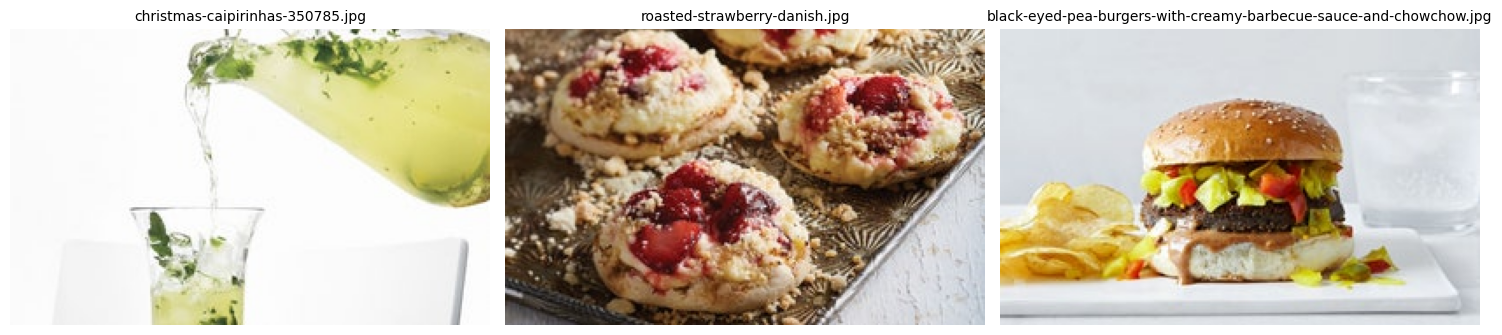

In [ ]:
# Path ke folder gambar
image_folder = '/content/food_data/Food Images/Food Images'

def show_random_images(image_folder, num_images=3):
    """
    Tampilkan sejumlah gambar secara acak dari folder.

    Args:
        image_folder (str): Path ke folder yang berisi gambar.
        num_images (int): Jumlah gambar yang ingin ditampilkan.
    """
    # List semua file gambar di folder
    images = [img for img in os.listdir(image_folder) if img.endswith(('.jpg', '.png', '.jpeg'))]

    if len(images) < num_images:
        print("Tidak cukup gambar di folder untuk ditampilkan.")
        return

    # Pilih gambar secara acak
    random_images = random.sample(images, num_images)

    # Plot gambar
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(random_images):
        img_path = os.path.join(image_folder, img_name)
        image = Image.open(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(img_name, fontsize=10)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan gambar
show_random_images(image_folder, num_images=3)


## Download the fashion data image

In [ ]:
!pip install awadb
!pip install chromadb
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.9 MB/s eta 0:00:00
 

In [ ]:
!pip install langchain

In [ ]:
pip install langchain-community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36


In [ ]:
import os
import shutil

# Path ke folder sumber dan tujuan
image_folder = '/content/food_data/Food Images/Food Images'
google_drive_path = '/content/drive/MyDrive/03. Work/03. IYKRA/weekly assignment - AI Engineering/week 2/food/'

# Pastikan folder tujuan ada, jika tidak buat folder tersebut
os.makedirs(google_drive_path, exist_ok=True)

# Filter file .jpg saja
jpg_images = [img for img in os.listdir(image_folder) if img.endswith('.jpg')]

# Salin file .jpg ke folder tujuan
for ind, img_name in enumerate(jpg_images):
    src_path = os.path.join(image_folder, img_name)
    dest_path = os.path.join(google_drive_path, img_name)

    # Copy file
    shutil.copy(src_path, dest_path)

    # Progress monitoring
    if ind % 100 == 0:
        print(f"Copied {ind} .jpg images")
    if ind >= 1000:  # Batasi hingga 1000 gambar
        break

print("Proses selesai!")


Copied 0 .jpg images
Copied 100 .jpg images
Copied 200 .jpg images
Copied 300 .jpg images
Copied 400 .jpg images
Copied 500 .jpg images
Copied 600 .jpg images
Copied 700 .jpg images
Copied 800 .jpg images
Copied 900 .jpg images
Copied 1000 .jpg images
Proses selesai!


In [ ]:
import uuid  # For generating unique identifiers for documents

# Import various embedding classes from LangChain
from langchain.embeddings import GPT4AllEmbeddings, HuggingFaceEmbeddings
from langchain.embeddings import AwaEmbeddings

# Import MultiVectorRetriever for managing multi-vector search and retrieval
from langchain.retrievers.multi_vector import MultiVectorRetriever

# Import Document class to structure documents with content and metadata
from langchain.schema.document import Document

# Import storage classes: LocalFileStore for local file-based storage, InMemoryStore for in-memory storage
from langchain.storage import LocalFileStore, InMemoryStore

# Import Chroma for vector storage, supporting similarity search and retrieval tasks
from langchain.vectorstores import Chroma

import ipywidgets as widgets  # For creating interactive widgets in Jupyter Notebook

# Initialize the embedding function with HuggingFace's pre-trained sentence transformer model
embedding_fn = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

<ipython-input-15-f6504ab1fbf7>:22: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_fn = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embedding_fn.model_name

'sentence-transformers/all-mpnet-base-v2'

In [ ]:
google_drive_path = "/content/drive/MyDrive/03. Work/03. IYKRA/weekly assignment - AI Engineering/week 2/food/"

In [ ]:
import os  # Untuk operasi sistem
import glob  # Untuk mencocokkan pola file
import numpy as np  # Untuk operasi numerik, seperti memilih gambar secara acak
from IPython.display import display  # Untuk menampilkan hasil
import ipywidgets as widgets  # Untuk membuat widget interaktif

# Path ke folder Google Drive
google_drive_path = "/content/drive/MyDrive/03. Work/03. IYKRA/weekly assignment - AI Engineering/week 2/food/"

# Ambil semua file gambar dengan ekstensi .jpg dari folder
image_files = glob.glob(f"{google_drive_path}*.jpg")

# Pilih 5 indeks secara acak tanpa pengulangan
random_image_idx = np.random.choice(len(image_files), 5, replace=False)

# Inisialisasi list untuk menyimpan widget gambar
image_widgets = []
for ind in random_image_idx:
    # Buka setiap file gambar yang dipilih secara acak dalam mode binary read
    with open(image_files[ind], "rb") as fp:
        # Buat widget untuk gambar dan tambahkan ke list
        image_widgets.append(widgets.Image(value=fp.read(), format="jpg", width=200))

# Tampilkan gambar dalam layout horizontal
display(widgets.HBox(image_widgets))


## Data Ingestion

In [ ]:
import base64  # Untuk encoding gambar ke format base64
import os  # Untuk operasi file
import pandas as pd  # Untuk membaca dan memproses data

# Fungsi untuk encode gambar ke base64
def encode_image(image_path):
    """
    Mengencode gambar menjadi string base64.

    Parameters:
    - image_path (str): Path file gambar.

    Returns:
    - str: String base64 dari gambar atau None jika file tidak ditemukan.
    """
    if os.path.exists(image_path):
        with open(image_path, "rb") as img_file:
            return base64.b64encode(img_file.read()).decode("utf-8")
    return None

# Path dataset dan folder gambar
csv_file = '/content/food_data/Food Ingredients and Recipe Dataset with Image Name Mapping.csv'
image_folder = '/content/food_data/Food Images/Food Images/'

# Baca dataset dan ganti kolom 'unnamed' dengan 'doc_id'
df = pd.read_csv(csv_file)
df.rename(columns={"unnamed": "doc_id"}, inplace=True)

# Tambahkan kolom untuk string base64 dari gambar
df['Image_Base64'] = df['Image_Name'].apply(lambda x: encode_image(os.path.join(image_folder, x)))

# Siapkan text_docs sebagai list of dictionaries
text_docs = [
    {
        "Title": row["Title"],
        "Ingredients": row["Ingredients"],
        "Instructions": row["Instructions"],
        "Cleaned_Ingredients": row["Cleaned_Ingredients"],
        "Image_Base64": row["Image_Base64"],
    }
    for _, row in df.iterrows()
]

# Tampilkan beberapa contoh text_docs
print(text_docs[:3])

# Opsional: Simpan text_docs ke file .json untuk digunakan nanti
import json
with open("text_docs.json", "w") as json_file:
    json.dump(text_docs, json_file, indent=4)


[{'Title': 'Miso-Butter Roast Chicken With Acorn Squash Panzanella', 'Ingredients': '[\'1 (3½–4-lb.) whole chicken\', \'2¾ tsp. kosher salt, divided, plus more\', \'2 small acorn squash (about 3 lb. total)\', \'2 Tbsp. finely chopped sage\', \'1 Tbsp. finely chopped rosemary\', \'6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature\', \'¼ tsp. ground allspice\', \'Pinch of crushed red pepper flakes\', \'Freshly ground black pepper\', \'⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups)\', \'2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces\', \'2 Tbsp. extra-virgin olive oil\', \'½ small red onion, thinly sliced\', \'3 Tbsp. apple cider vinegar\', \'1 Tbsp. white miso\', \'¼ cup all-purpose flour\', \'2 Tbsp. unsalted butter, room temperature\', \'¼ cup dry white wine\', \'2 cups unsalted chicken broth\', \'2 tsp. white miso\', \'Kosher salt, freshly ground pepper\']', 'Instructions': 'Pat chicken dry with pape

In [ ]:
# Path dataset dan folder gambar
csv_file = '/content/food_data/Food Ingredients and Recipe Dataset with Image Name Mapping.csv'
image_folder = '/content/food_data/Food Images/Food Images/'

# Baca dataset dan hitung jumlah baris
df = pd.read_csv(csv_file)
num_csv_rows = df.shape[0]  # Menghitung jumlah baris dalam CSV file

# Hitung jumlah file gambar di folder
num_image_files = len(os.listdir(image_folder))  # Hitung jumlah file dalam folder gambar

# Tampilkan jumlah file
print(f"Jumlah entri dalam CSV: {num_csv_rows}")
print(f"Jumlah file gambar di folder: {num_image_files}")


Jumlah entri dalam CSV: 13501
Jumlah file gambar di folder: 13582


In [ ]:
# This line of code creates a list of Document objects, called image_documents, where each document represents a base64-encoded image along with its associated metadata
image_documents = [
    Document(page_content=s, metadata={id_key: doc_ids[i]})
    for i, s in enumerate(img_base64_list)
]


NameError: name 'img_base64_list' is not defined

In [ ]:
import os
import pandas as pd
import json

# Path ke file CSV dan folder tujuan di Google Drive
csv_file = '/content/food_data/Food Ingredients and Recipe Dataset with Image Name Mapping.csv'
google_drive_path = "/content/drive/MyDrive/03. Work/03. IYKRA/weekly assignment - AI Engineering/week 2/food/"

# Pastikan folder tujuan ada
os.makedirs(google_drive_path, exist_ok=True)

# Baca data CSV
df = pd.read_csv(csv_file)

# Tambahkan kolom 'doc_id' jika belum ada
if 'doc_id' not in df.columns:
    df['doc_id'] = df.index + 1

# Konversi data ke dalam format text_docs
text_docs = [
    {
        "doc_id": row["doc_id"],
        "Title": row["Title"],
        "Ingredients": row["Ingredients"],
        "Instructions": row["Instructions"],
        "Cleaned_Ingredients": row["Cleaned_Ingredients"],
        "Image_Name": row["Image_Name"],
    }
    for _, row in df.iterrows()
]

# Path untuk file JSON output
json_output_path = os.path.join(google_drive_path, "text_docs.json")

# Simpan text_docs ke file JSON
with open(json_output_path, "w") as json_file:
    json.dump(text_docs, json_file, indent=4)

print(f"Data berhasil disimpan sebagai JSON di: {json_output_path}")


Data berhasil disimpan sebagai JSON di: /content/drive/MyDrive/03. Work/03. IYKRA/weekly assignment - AI Engineering/week 2/food/text_docs.json


In [ ]:
import os
import json
import base64
from PIL import Image
from io import BytesIO
from IPython.display import display

# Path ke file JSON dan folder gambar
google_drive_path = "/content/drive/MyDrive/03. Work/03. IYKRA/weekly assignment - AI Engineering/week 2/food/"
json_file_path = os.path.join(google_drive_path, "text_docs.json")
image_folder = "/content/food_data/Food Images/"

# Load text_docs dari file JSON
with open(json_file_path, "r") as json_file:
    text_docs = json.load(json_file)

# Index gambar yang ingin ditampilkan
f_index = 700

# Pastikan indeks valid
if f_index >= len(text_docs):
    raise IndexError(f"Indeks {f_index} melebihi panjang text_docs ({len(text_docs)}).")

# Ambil data gambar dari text_docs
image_name = text_docs[f_index]["Image_Name"]
image_path = os.path.join(image_folder, image_name)

# Baca dan tampilkan gambar
if os.path.exists(image_path):
    with open(image_path, "rb") as img_file:
        image_data = img_file.read()
        im = Image.open(BytesIO(image_data))
        display(im)
else:
    print(f"Gambar {image_name} tidak ditemukan di {image_folder}.")

# Tampilkan ringkasan (summary) untuk indeks ini
print("Summary Document:")
print(json.dumps(text_docs[f_index], indent=4))


Gambar cabbage-tabbouleh tidak ditemukan di /content/food_data/Food Images/.
Summary Document:
{
    "doc_id": 701,
    "Title": "Cabbage Tabbouleh",
    "Image_Name": "cabbage-tabbouleh"
}


## Build the Retriever

In [ ]:
# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="summaries", embedding_function=embedding_fn)

# The storage layer for the parent documents
store = InMemoryStore()

retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
)

In [ ]:
import os
import pandas as pd
import json
import base64
from PIL import Image
from io import BytesIO
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma
from langchain.retrievers import MultiVectorRetriever
from langchain.schema.document import Document

# Path ke file CSV dan folder tujuan
csv_file = '/content/food_data/Food Ingredients and Recipe Dataset with Image Name Mapping.csv'
google_drive_path = "/content/drive/MyDrive/03. Work/03. IYKRA/weekly assignment - AI Engineering/week 2/food/"
image_folder = "/content/food_data/Food Images/"

# Baca data CSV
df = pd.read_csv(csv_file)

# Tambahkan kolom 'doc_id' jika belum ada
if 'doc_id' not in df.columns:
    df['doc_id'] = df.index + 1

# Pastikan kolom 'Ingredients' dan 'Instructions' dalam bentuk string
df['Ingredients'] = df['Ingredients'].fillna("").astype(str)
df['Instructions'] = df['Instructions'].fillna("").astype(str)

# Konversi data ke dalam format text_docs sebagai objek Document
text_docs = [
    Document(
        page_content=row["Ingredients"] + "\n" + row["Instructions"],  # Gabungkan Ingredients dan Instructions sebagai konten utama
        metadata={"doc_id": row["doc_id"], "Title": row["Title"], "Image_Name": row["Image_Name"]}
    )
    for _, row in df.iterrows()
]

# Path untuk menyimpan text_docs sebagai JSON
json_output_path = os.path.join(google_drive_path, "text_docs.json")

# Simpan text_docs ke file JSON
with open(json_output_path, "w") as json_file:
    json.dump([doc.metadata for doc in text_docs], json_file, indent=4)

# Load embeddings function
embedding_fn = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

# Initialize vector store (Chroma) and document store (InMemoryStore)
vectorstore = Chroma(collection_name="food_recipes", embedding_function=embedding_fn)
docstore = InMemoryStore()

# Menambahkan dokumen teks ke dalam vectorstore
vectorstore.add_documents(text_docs)

# Menambahkan dokumen gambar ke dalam docstore
image_documents = []
for doc in text_docs:
    image_name = doc.metadata["Image_Name"]
    image_path = os.path.join(image_folder, image_name)

    # Baca dan encode gambar ke dalam base64
    if os.path.exists(image_path):
        with open(image_path, "rb") as img_file:
            image_data = img_file.read()
            image_base64 = base64.b64encode(image_data).decode('utf-8')
            image_documents.append(Document(page_content=image_base64, metadata={"doc_id": doc.metadata["doc_id"]}))
    else:
        print(f"Gambar {image_name} tidak ditemukan di {image_folder}.")

# Menambahkan dokumen gambar ke dalam docstore
docstore.mset([(doc.metadata["doc_id"], image_doc) for doc, image_doc in zip(text_docs, image_documents)])

# Membuat retriever untuk pencarian berbasis teks dan gambar
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=docstore,
    id_key="doc_id"
)

print(f"Data teks berhasil disimpan di vectorstore dan gambar di docstore.")


Streaming output truncated to the last 5000 lines.
Gambar citrus-arancine-with-pecorino-cheese-354832 tidak ditemukan di /content/food_data/Food Images/.
Gambar trail-mix-freezer-cookies-354854 tidak ditemukan di /content/food_data/Food Images/.
Gambar #NAME? tidak ditemukan di /content/food_data/Food Images/.
Gambar hummus-and-crudites-354872 tidak ditemukan di /content/food_data/Food Images/.
Gambar fig-salad-with-goats-milk-yogurt-and-pepper-cress-354871 tidak ditemukan di /content/food_data/Food Images/.
Gambar clam-and-calamari-seafood-stew-with-salsa-verde-354858 tidak ditemukan di /content/food_data/Food Images/.
Gambar spiced-pear-flatbreads-with-goat-cheese-and-mustard-cream-354834 tidak ditemukan di /content/food_data/Food Images/.
Gambar lamb-with-preserved-lemons-354856 tidak ditemukan di /content/food_data/Food Images/.
Gambar seared-mahi-mahi-with-green-gazpacho-sauce-354849 tidak ditemukan di /content/food_data/Food Images/.
Gambar milk-braised-pork-shoulder-with-semolin

In [ ]:
retriever.vectorstore.get(where={"doc_id": "1345"})

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'data': None,
 'metadatas': [],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

##Test Retriever - Vector Similarity Search between Query and Text Description

In [ ]:
# Define a function to display images with optional text descriptions
def show_images(docs, show_text=False):
    # If show_text is True, display the text description for each document
    if show_text:
        for i, sample_doc in enumerate(docs):
            # Retrieve the text description from the vector store based on the document ID
            text_desc = retriever.vectorstore.get(
                where={"doc_id": sample_doc.metadata["doc_id"]}, include=["documents"]
            )["documents"][0]
            print(text_desc)  # Print the description to the console

    # Create image widgets for each document to display in a horizontal layout
    image_widgets = [
        widgets.Image(
            value=base64.b64decode(sample_doc.page_content),  # Decode base64 image data
            format="jpg",  # Specify the image format as PNG
            width=300  # Set the display width of each image
        )
        for sample_doc in docs
    ]

    # Display the images in a horizontal box layout in the notebook
    display(widgets.HBox(image_widgets))

# Examples of possible queries for the retriever
# retriever.vectorstore.similarity_search("floor length gown")

# Example user queries for retrieving documents based on clothing style and occasion
query = "Suggest sweets baked fresh daily"
# query = "Suggest strapless floor length gowns that I can wear in my friend's wedding"
#query = "Suggest a dress with flowing style having floral pattern"

# Retrieve documents relevant to the query
docs = retriever.get_relevant_documents(query)

# Display the retrieved images with the function, without showing text descriptions
show_images(docs)

<ipython-input-28-0ec349b6bbee>:34: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


HBox()

In [ ]:
query = "Are these sweets baked fresh daily"
# Retrieve documents relevant to the query
docs = retriever.get_relevant_documents(query)

# Display the retrieved images with the function, without showing text descriptions
show_images(docs)

HBox()

In [ ]:
retriever.vectorstore.similarity_search("Crispy Salt and Pepper Potatoes")

[Document(metadata={'Image_Name': 'onion-dip-potato-chips', 'Title': 'Onion-Dip Potato Chips', 'doc_id': 875}, page_content="['2 Tbsp. onion powder', '1 Tbsp. garlic powder', '3/4 tsp. crushed red pepper flakes', '1/2 tsp. kosher salt', '1 (8-oz.) bag kettle-cooked salted potato chips', '1/4 cup extra-virgin olive oil', '1/3 cup finely chopped dill', '1 lemon', 'Freshly ground black pepper', 'A spice mill']\nPreheat oven to 425°F. Grind onion powder, garlic powder, red pepper flakes, and salt in spice mill until red pepper flakes are finely ground. Transfer to a small bowl and set aside.\nSpread out potato chips on a rimmed baking sheet. Bake, tossing halfway through, until deep golden brown, about 5 minutes.\nTransfer potato chips to a large bowl and drizzle with oil. Sprinkle reserved spice mixture over and add two-thirds of dill. Finely zest lemon over chips. Sprinkle with lots of black pepper and toss to coat (do all this while the chips are still warm so they absorb the flavors of

##Enhance Multimodal RAG - with LLM Chaining

In [ ]:
import re  # For regular expressions to validate base64 format

# Import necessary classes from LangChain
from langchain.schema import Document  # To define document structure
from langchain.schema.runnable import RunnableLambda  # For creating lambda functions in LangChain
# https://api.python.langchain.com/en/latest/runnables/langchain_core.runnables.base.RunnableLambda.html
from langchain.chat_models import ChatOpenAI  # For using OpenAI chat models

# Function to check if a string appears to be in base64 format
def looks_like_base64(sb):
    """
    Checks if the given string matches the pattern of base64 encoding.

    Parameters:
    - sb (str): The string to check.

    Returns:
    - bool: True if the string appears to be base64, False otherwise.
    """
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None

# Function to verify if the base64 data represents an image by examining its header signature
def is_image_data(b64data):
    """
    Checks if base64-encoded data represents an image by comparing its header to known image file signatures.

    Parameters:
    - b64data (str): The base64-encoded data to check.

    Returns:
    - bool: True if the data matches a known image format, False otherwise.
    """
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",  # JPEG signature
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",  # PNG signature
        b"\x47\x49\x46\x38": "gif",  # GIF signature
        b"\x52\x49\x46\x46": "webp",  # WebP signature
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode the first 8 bytes to check the header
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True  # Matches an image signature
        return False
    except Exception:
        return False  # Return False if decoding or header check fails

# Function to fetch matching texts and images from documents using metadata (doc_id)
def fetch_texts(docs, top_k=3):
    """
    Retrieves text descriptions and base64-encoded images from documents.

    Parameters:
    - docs (list): List of Document objects.
    - top_k (int): The maximum number of items to retrieve for each type (images and texts).

    Returns:
    - dict: A dictionary with "images" and "texts" keys containing up to top_k base64-encoded images and text descriptions.
    """
    b64_images = []  # List to store base64-encoded images
    texts = []  # List to store text descriptions

    for doc in docs:
        # Retrieve the text description based on the document's ID
        doc_id = doc.metadata["doc_id"]
        text = retriever.vectorstore.get(
            where={"doc_id": doc_id}, include=["documents"]
        )["documents"][0]  # Get the first document matching the ID
        texts.append(text)  # Add the text description to the texts list

        # Check if the document content is base64-encoded image data
        doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            b64_images.append(doc)  # Add the image data if it matches an image format

    # Return the top_k items for both images and texts
    return {"images": b64_images[:top_k], "texts": texts[:top_k]}

##Define the prompt

In [ ]:
import os

# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
# Function to generate prompt messages for a multi-modal model
def img_prompt_func(data_dict):
    # Initialize an empty list to hold messages
    messages = []

    # Define the initial text message providing context and the user's question
    text_message = {
        "type": "text",
        "text": (
            "You are a friendly restaurant assistant here to help you find the perfect meal.\n"
            "Browse through a selection of delicious dishes, complete with images and descriptions, and let me help you choose your next favorite meal!.\n"
            "Use this information to help you discover the perfect dish for your meal. I'm here to guide you through our menu and find something you'll love!.\n"
            f"User-provided question: {data_dict['question']}\n\n"
            "Images and their descriptions:\n"
        ),
    }
    messages.append(text_message)  # Add the initial context message to messages list

    # Get the number of text descriptions available in the context data
    num_docs = len(data_dict["context"]["texts"])

    # Loop through each image and corresponding description
    for i, im in enumerate(data_dict["context"]["images"]):
        # Add each image as a base64-encoded URL to the messages list
        image_message = {
            "type": "image_url",
            "image_url": {"url": f"data:image/png;base64,{im}"},
        }
        messages.append(image_message)

        # Add the corresponding text description for each image
        desc_text = data_dict["context"]["texts"][i]
        messages.append({"type": "text", "text": desc_text})

    # Return all messages as a list wrapped in a HumanMessage object
    return [HumanMessage(content=messages)]



In [ ]:
model = ChatOpenAI(
        temperature=0,  # Set temperature to 0 for deterministic responses
        model="gpt-4-vision-preview",  # Specify the GPT-4 Vision model
        max_tokens=1024  # Maximum tokens in the response
    )

<ipython-input-34-3da80bf1838f>:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  model = ChatOpenAI(


In [ ]:
# LangChain Expression Language
from functools import partial  # For creating partial functions with preset parameters

# Import LangChain components for building runnable chains and output parsing
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

# Define a dummy processing chain using LangChain's runnable functions
dummy_chain = (
    {
        # Use the retriever to get context data, then run it through `fetch_texts` with top_k=3
        "context": retriever | RunnableLambda(partial(fetch_texts, top_k=3)),

        # Pass the user's question through without modifications
        "question": RunnablePassthrough(),
    }
    # Format the retrieved context and question into prompt messages for the model
    | RunnableLambda(img_prompt_func)
)


In [ ]:
dummy_chain

{
  context: MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7b8837139ba0>, docstore=<langchain_core.stores.InMemoryStore object at 0x7b88376a1150>, search_kwargs={})
           | RunnableLambda(...),
  question: RunnablePassthrough()
}
| RunnableLambda(img_prompt_func)

In [ ]:
from langchain.schema import HumanMessage

from IPython.display import display, HTML  # For displaying HTML content (e.g., images) in Jupyter notebooks

# Invoke the dummy_chain to generate suggestions based on the user's query
sample_docs = dummy_chain.invoke("Are there any sweet dishes that include nuts?")
# Alternative queries for testing
# sample_docs = dummy_chain.invoke("Suggest a bright dress with floral pattern that I can wear with a handbag and a sunglass")
# sample_docs = dummy_chain.invoke("Suggest a floor-length gown that I can wear in my friend's wedding")

# Loop through the content of the response generated by dummy_chain
for sample in sample_docs[0].content:
    # Check if the sample is a text message
    if sample["type"] == "text":
        print(sample["text"])  # Print text suggestions to the console
    else:
        # If the sample is an image, display it in the notebook
        display(HTML("<img alt='img' src='{}'>".format(sample["image_url"]["url"])))

You are a friendly restaurant assistant here to help you find the perfect meal.
Browse through a selection of delicious dishes, complete with images and descriptions, and let me help you choose your next favorite meal!.
Use this information to help you discover the perfect dish for your meal. I'm here to guide you through our menu and find something you'll love!.
User-provided question: Are there any sweet dishes that include nuts?

Images and their descriptions:



In [ ]:
sample_docs = dummy_chain.invoke(" recommend a dish that's perfect for a light lunch")

In [ ]:
sample_docs

[HumanMessage(content=[{'type': 'text', 'text': "You are a friendly restaurant assistant here to help you find the perfect meal.\nBrowse through a selection of delicious dishes, complete with images and descriptions, and let me help you choose your next favorite meal!.\nUse this information to help you discover the perfect dish for your meal. I'm here to guide you through our menu and find something you'll love!.\nUser-provided question:  recommend a dish that's perfect for a light lunch\n\nImages and their descriptions:\n"}], additional_kwargs={}, response_metadata={})]

In [ ]:
# Loop through the content of the response generated by dummy_chain
for sample in sample_docs[0].content:
    # Check if the sample is a text message
    if sample["type"] == "text":
        print(sample["text"])  # Print text suggestions to the console
    else:
        # If the sample is an image, display it in the notebook
        display(HTML("<img alt='img' src='{}'>".format(sample["image_url"]["url"])))

You are a friendly restaurant assistant here to help you find the perfect meal.
Browse through a selection of delicious dishes, complete with images and descriptions, and let me help you choose your next favorite meal!.
Use this information to help you discover the perfect dish for your meal. I'm here to guide you through our menu and find something you'll love!.
User-provided question:  recommend a dish that's perfect for a light lunch

Images and their descriptions:



In [ ]:
len(sample_docs), len(sample_docs[0].content)

(1, 1)

##Create Full Chain

In [ ]:
!pip install openai

In [ ]:
model = ChatOpenAI(
    temperature=0,
    model="gpt-4o",
    max_tokens=1024,
    api_key=os.environ["OPENAI_API_KEY"],
)
top_k = 3
# RAG pipeline
chain = (
    {
        "context": retriever | RunnableLambda(partial(fetch_texts, top_k=top_k)),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(img_prompt_func)
    | model
    | StrOutputParser()
)

In [ ]:
query = "sweet dishes that include nuts"

res = chain.invoke(query)
print(res)

images = retriever.get_relevant_documents(query)
display(
    HTML(
        "<table><tr>{}</tr></table>".format(
            "<td>{}</td>".format(
                "</td><td>".join(
                    "<img src='data:image/png;base64,{}' >".format(
                        sample_doc.page_content
                    )
                    for sample_doc in images[:top_k]
                )
            )
        )
    )
)

Here are some sweet dishes that include nuts, which you might find delightful:

1. **Baklava**: A rich, sweet pastry made of layers of filo dough filled with chopped nuts, usually walnuts or pistachios, and sweetened with honey or syrup. It's a classic Middle Eastern dessert known for its flaky texture and nutty flavor.

2. **Pecan Pie**: A traditional American dessert, especially popular during the holidays. It features a buttery, flaky crust filled with a gooey mixture of pecans, eggs, butter, and sugar, often with a hint of vanilla or bourbon.

3. **Almond Biscotti**: These Italian cookies are twice-baked, making them crunchy and perfect for dipping in coffee. They are made with almonds, giving them a nutty flavor that complements their sweet, buttery taste.

4. **Hazelnut Chocolate Torte**: A decadent dessert that combines the rich flavors of chocolate and hazelnuts. This torte is often flourless, making it dense and fudgy, with a smooth, nutty finish.

5. **Walnut Brownies**: Clas

""


In [ ]:
query = "some of the spiciest dishes"

res = chain.invoke(query)

print(res)
images = retriever.get_relevant_documents(query)
display(
    HTML(
        "<table><tr>{}</tr></table>".format(
            "<td>{}</td>".format(
                "</td><td>".join(
                    "<img src='data:image/png;base64,{}' >".format(
                        sample_doc.page_content
                    )
                    for sample_doc in images[:top_k]
                )
            )
        )
    )
)

Sure! Here are some of the spiciest dishes you might enjoy:

1. **Spicy Thai Green Curry**: This dish features a vibrant green curry paste made from green chilies, lemongrass, and other aromatic herbs. It's typically cooked with coconut milk, chicken or tofu, and a variety of vegetables. The heat level can be quite intense, but it's balanced by the creamy coconut milk.

2. **Vindaloo**: A popular Indian dish known for its fiery heat, Vindaloo is made with a blend of spices including red chilies, vinegar, garlic, and ginger. It's often prepared with pork, but you can also find chicken or lamb versions. The dish is both spicy and tangy, making it a favorite for spice lovers.

3. **Sichuan Hot Pot**: Originating from the Sichuan province in China, this dish is famous for its numbing and spicy flavors. The broth is infused with Sichuan peppercorns and dried red chilies, and you can cook a variety of meats and vegetables in it. It's a communal dish that's perfect for sharing with friends.



""


Sure! Here are some of the spiciest dishes you might enjoy:

1. **Spicy Thai Green Curry**: This dish features tender pieces of chicken or tofu simmered in a rich and creamy coconut milk-based curry sauce, infused with green chilies, lemongrass, and Thai basil. It's served with steamed jasmine rice and garnished with fresh cilantro and lime wedges.

2. **Vindaloo Curry**: A fiery Indian curry made with marinated pork or chicken, cooked with a blend of spices including red chili powder, vinegar, garlic, and ginger. This dish is known for its intense heat and tangy flavor, often served with naan or basmati rice.

3. **Sichuan Hot Pot**: A traditional Chinese dish where a simmering pot of spicy broth is placed at the center of the table. Diners cook a variety of meats, seafood, and vegetables in the broth, which is flavored with Sichuan peppercorns, dried chilies, and other aromatic spices.

4. **Jamaican Jerk Chicken**: This dish features chicken marinated in a spicy mixture of Scotch bo

,,,,

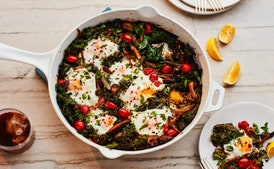
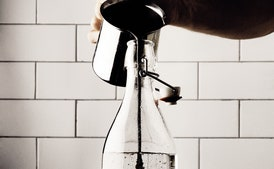
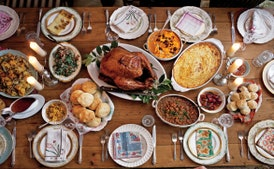
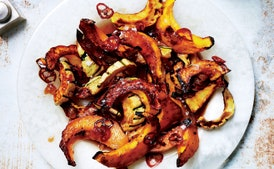
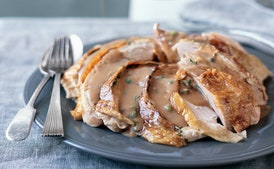

In [ ]:
from IPython.display import display, HTML
import os
import base64

query = "some of the spiciest dishes"

# Memanggil chain untuk mendapatkan hasil pencarian
res = chain.invoke(query)
print(res)

# Path ke direktori gambar
google_drive_path = "/content/drive/MyDrive/03. Work/03. IYKRA/weekly assignment - AI Engineering/week 2/food/"

# Menyimpan gambar yang relevan dari folder
images_html = ""
top_k = 5  # Jumlah maksimum gambar yang ingin ditampilkan

for i, filename in enumerate(os.listdir(google_drive_path)):
    if i >= top_k:  # Batas jumlah gambar yang akan ditampilkan
        break
    file_path = os.path.join(google_drive_path, filename)
    with open(file_path, "rb") as image_file:
        # Mengonversi gambar menjadi Base64 untuk HTML
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
        # Menyusun HTML untuk gambar
        images_html += f"<td><img src='data:image/png;base64,{encoded_image}' style='max-width:200px;'></td>"

# Menampilkan hasil pencarian dan gambar dalam tabel HTML
display(
    HTML(
        f"""
        <table>
            <tr>
                {images_html}
            </tr>
        </table>
        """
    )
)


Of course! Here are some kid-friendly and less spicy dishes that you might enjoy:

1. **Classic Mac and Cheese**: A creamy and cheesy delight made with tender pasta and a rich cheese sauce. It's a comforting favorite for kids and adults alike.

2. **Chicken Tenders with Fries**: Crispy, golden-brown chicken tenders served with a side of perfectly seasoned fries. This dish is a hit with kids and is mild in flavor.

3. **Cheese Pizza**: A classic cheese pizza with a soft crust, tangy tomato sauce, and melted mozzarella cheese. It's simple and delicious, perfect for kids.

4. **Spaghetti with Marinara Sauce**: A traditional pasta dish with a mild tomato-based marinara sauce. It's flavorful without being spicy, making it a great choice for kids.

5. **Grilled Cheese Sandwich**: A warm and gooey sandwich made with melted cheese between two slices of buttery, toasted bread. It's a timeless favorite for all ages.

If you have any specific preferences or dietary restrictions, feel free to let 

,,,,

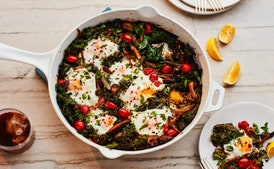
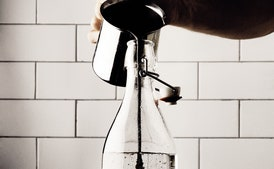
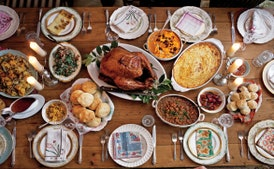
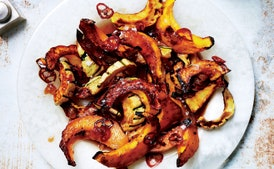
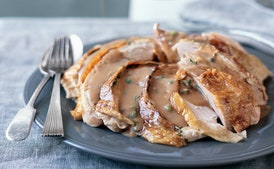

In [ ]:
from IPython.display import display, HTML
import os
import base64

query = "Are there any dishes that are kid-friendly or less spicy?"

# Memanggil chain untuk mendapatkan hasil pencarian
res = chain.invoke(query)
print(res)

# Path ke direktori gambar
google_drive_path = "/content/drive/MyDrive/03. Work/03. IYKRA/weekly assignment - AI Engineering/week 2/food/"

# Menyimpan gambar yang relevan dari folder
images_html = ""
top_k = 5  # Jumlah maksimum gambar yang ingin ditampilkan

for i, filename in enumerate(os.listdir(google_drive_path)):
    if i >= top_k:  # Batas jumlah gambar yang akan ditampilkan
        break
    file_path = os.path.join(google_drive_path, filename)
    with open(file_path, "rb") as image_file:
        # Mengonversi gambar menjadi Base64 untuk HTML
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
        # Menyusun HTML untuk gambar
        images_html += f"<td><img src='data:image/png;base64,{encoded_image}' style='max-width:200px;'></td>"

# Menampilkan hasil pencarian dan gambar dalam tabel HTML
display(
    HTML(
        f"""
        <table>
            <tr>
                {images_html}
            </tr>
        </table>
        """
    )
)
